#### NOTEBOOK PRESENTACIÓN PRÁCTICA OBLIGATORIA U2, SPRINT 8

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

sns.set(color_codes = True)
sns.set_style("white")

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.drop(columns = ["deck", "survived", "pclass", "embarked"], inplace = True)
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns = ["parch", "sibsp"], inplace = True)
df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0], inplace = True)
df_titanic["age"] = df_titanic.groupby("who")["age"].transform(lambda x: x.fillna(x.mean()))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_38920\3957697346.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0], inplace = True)


In [3]:
def card (df_titanic, umbral_categoria, umbral_continua):
    
    cardinalidad = df_titanic.nunique()
    porcentaje_card = df_titanic.nunique()/len(df_titanic) * 100
    tipos = []

    for col in df_titanic.columns:
        card = cardinalidad[col]
        pct = porcentaje_card[col]

        if card == 2:
            tipos.append("Binaria")
        
        elif card <= umbral_categoria:
            tipos.append("Categórica")
   
        else: 
            if pct >= umbral_continua:
                tipos.append("Numérica Continua")
            else:
                tipos.append("Numérica Discreta")

    
    df_resultado = pd.DataFrame({"Cardinalidad" : cardinalidad, "% Cardinalidad" : porcentaje_card, "Tipo Variable": tipos})
    return df_resultado

card(df_titanic, 6, 9)

,Cardinalidad,% Cardinalidad,Tipo Variable
sex,2,0.224467,Binaria
age,89,9.988777,Numérica Continua
fare,248,27.833895,Numérica Continua
class,3,0.336700,Categórica
who,3,0.336700,Categórica
adult_male,2,0.224467,Binaria
embark_town,3,0.336700,Categórica
alive,2,0.224467,Binaria
alone,2,0.224467,Binaria
family_members,9,1.010101,Numérica Discreta


1. El titanic fue un accidente con una tasa de mortalidad alta.   

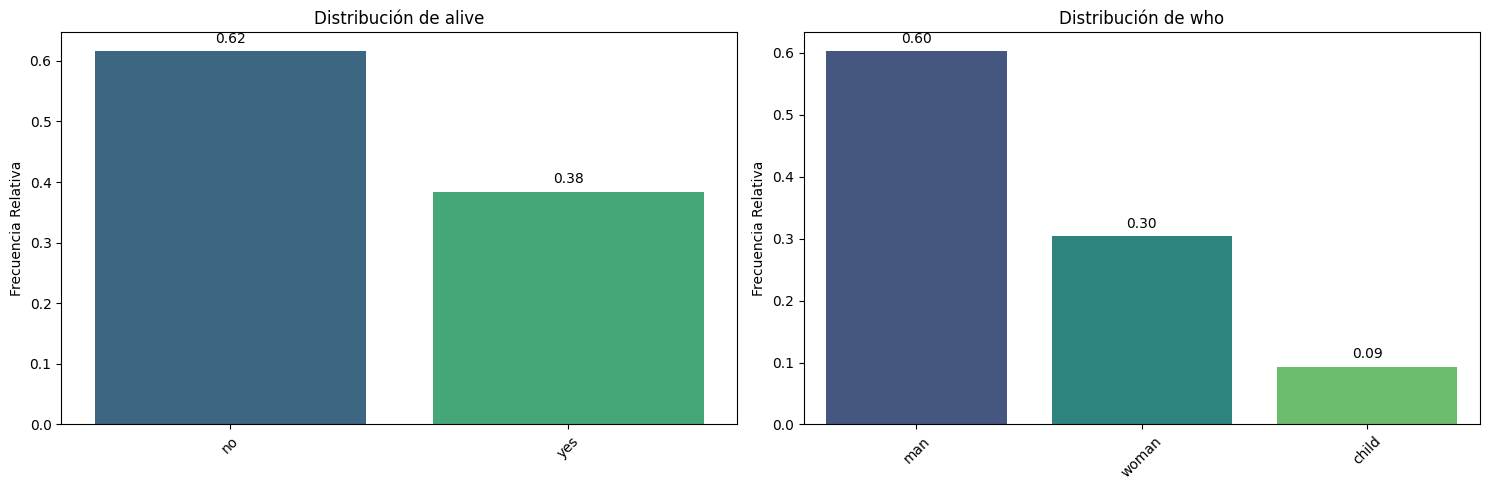

In [5]:
pinta_distribucion_categoricas(df_titanic,["alive","who"], relativa= True, mostrar_valores= True)

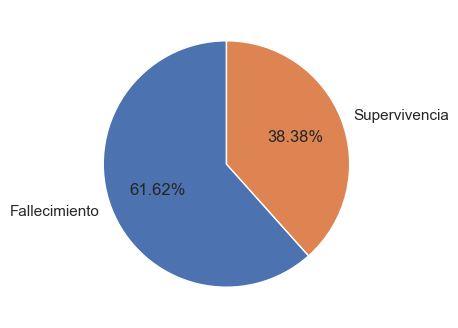

In [9]:
data = df_titanic["alive"].value_counts()

label_map = {
    "yes" : "Supervivencia",
    "no" : "Fallecimiento"
}

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
       labels=[label_map[label] for label in data.index],
        autopct='%.2f%%', startangle= 90);

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  

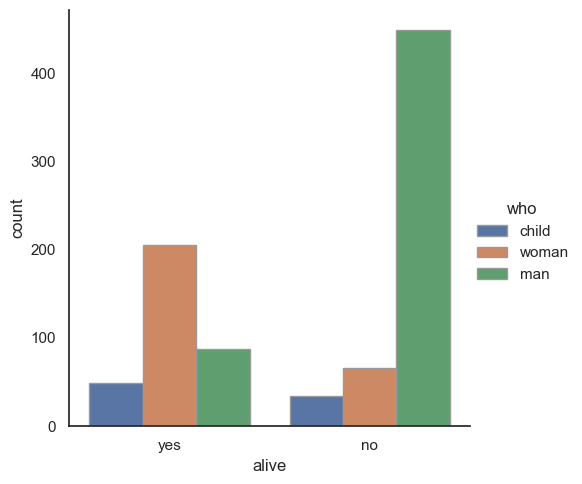

In [16]:
sns.catplot(x = "alive",
            hue = "who",
            kind = "count",
            edgecolor = ".6",
            orient = "V",
            data = df_titanic.sort_values("class"));

In [18]:
filtro = df_titanic[(df_titanic["who"] != "man") & (df_titanic["alive"])]

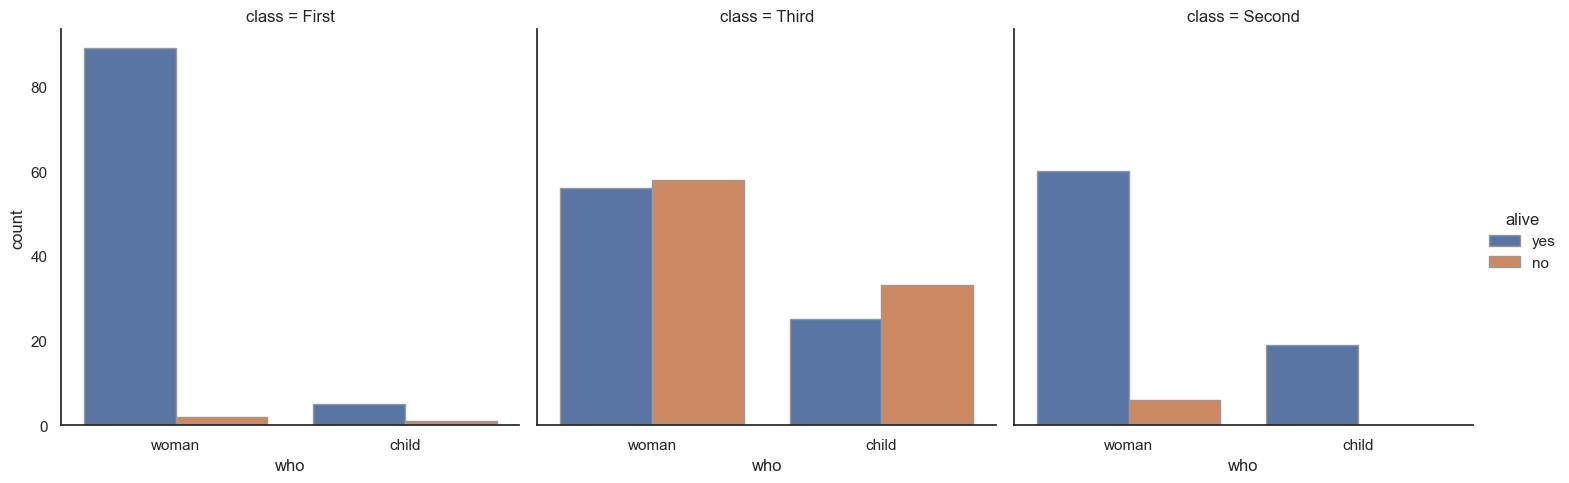

In [21]:
sns.catplot(x="who",
            col = "class",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=filtro);

*En términos relativos, se observa que tanto niños como mujeres, presentan una mayor tasa de supervivencia frente a los hombres. Se oberva una alta mortalidad en niños,
lo cual puede tener que ver con la clase. Comparo entre mujeres y niños*

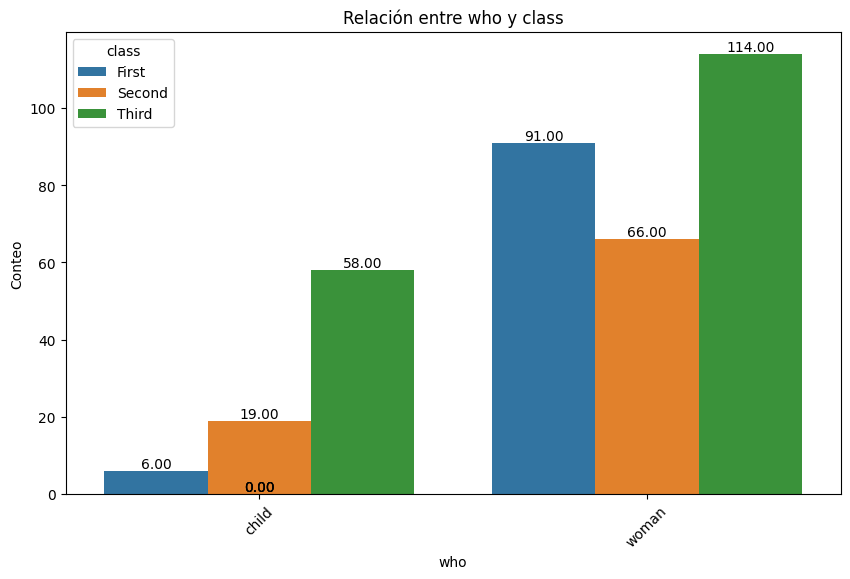

In [7]:
filtro = df_titanic[(df_titanic["who"] != "man") & (df_titanic["alive"])]

plot_categorical_relationship_fin(filtro, "who", "class", relative_freq= False, show_values=True)

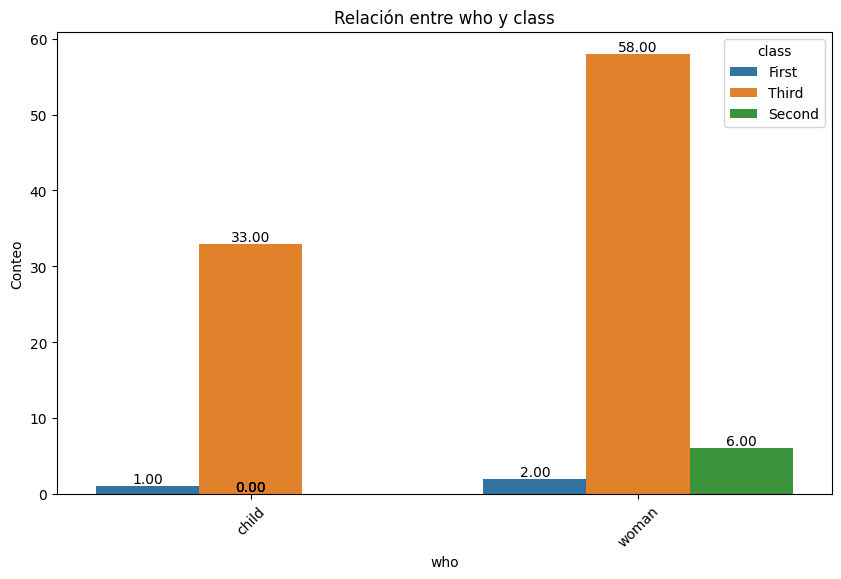

In [8]:
filtro = df_titanic[(df_titanic["who"] != "man") & (df_titanic["alive"] == "no")]

plot_categorical_relationship_fin(filtro, "who", "class", relative_freq= False, show_values=True)

In [9]:
tabla_contingencia = pd.crosstab(df_titanic["who"], df_titanic["alive"])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print(chi2)
print(p)
print(dof)
print(expected)

283.923050324233
2.2227620817798914e-62
2
[[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  

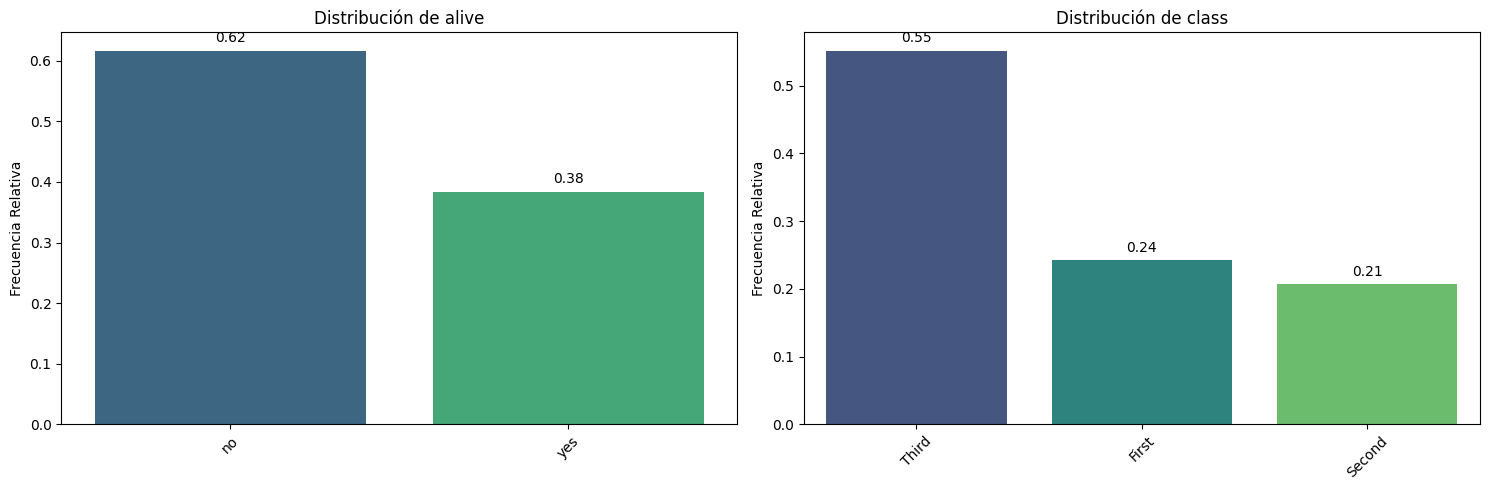

In [10]:
pinta_distribucion_categoricas(df_titanic,["alive","class"], relativa= True, mostrar_valores= True)

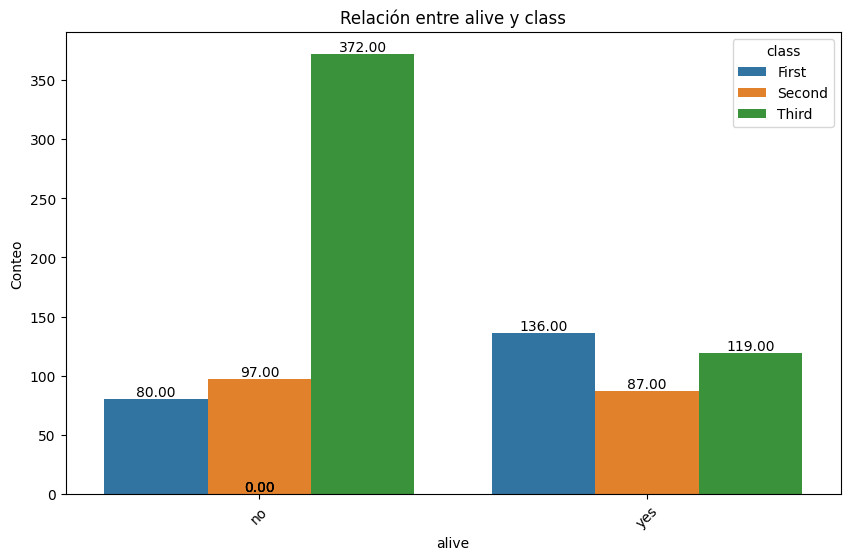

In [11]:
plot_categorical_relationship_fin(df_titanic, "alive","class", show_values = True)

In [12]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2, "\n")
print("P-Value:", p, "\n")
print("Grados de Libertad:", dof, "\n")
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056 

P-Value: 4.549251711298793e-23 

Grados de Libertad: 2 

Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


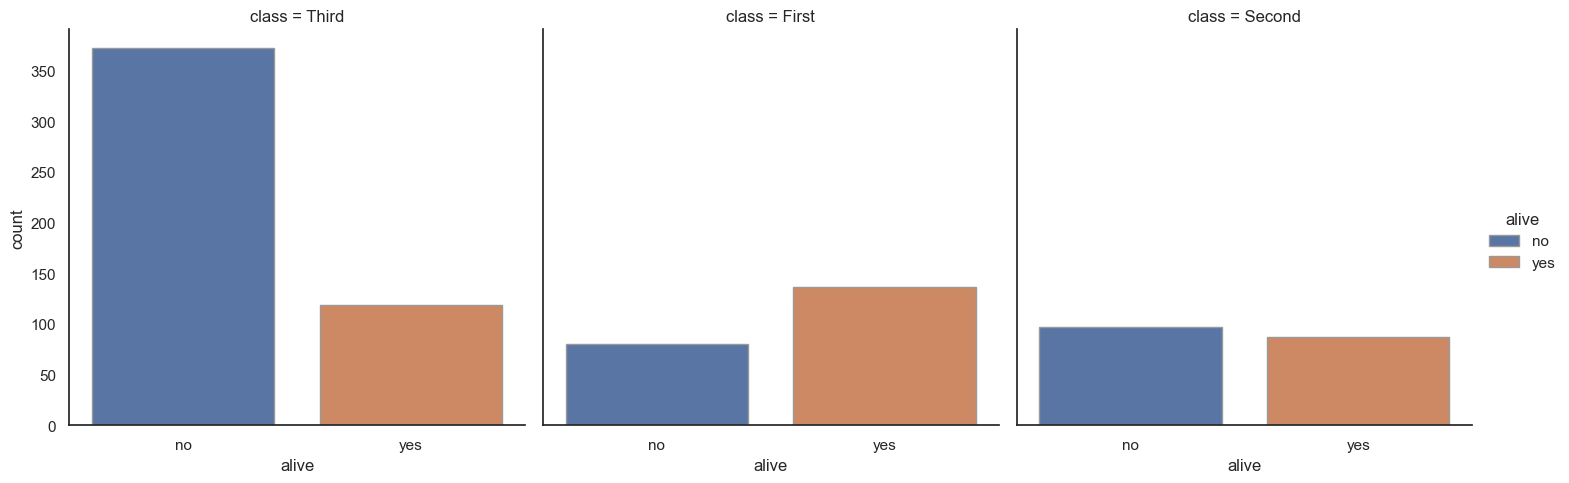

In [25]:
sns.catplot(x="alive",
            col = "class",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=df_titanic);

*Los datos analizados, muestran una fuerte relación entrela supervivencia y la clase. El mayor número de fallecidos fue de tercera clase, frente al menor, de primera clase. Según el contexto histórico, esto puede deberse al nivel socioeconómico, que situaba a los pasajeros de primera clase en los camarotes más altos (lo que aumenta la probabilidad de supervivencia). En cuanto a los pasajeros de tercera clase, se encontraban en los camarotes más bajos del barco, aumentando así su probabilidad de no sobrevivir*

5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.

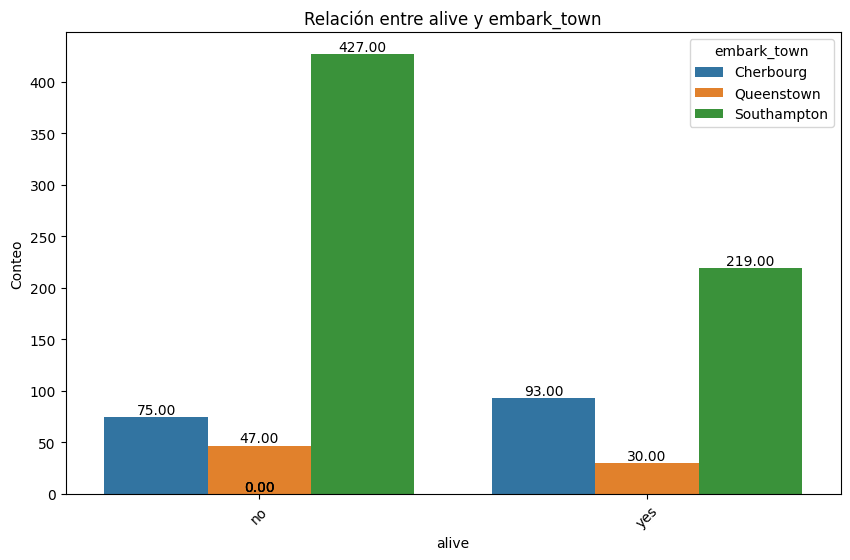

In [13]:
plot_categorical_relationship_fin(df_titanic, "alive","embark_town", show_values = True)

In [14]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2, "\n")
print("P-Value:", p, "\n")
print("Grados de Libertad:", dof, "\n")
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784 

P-Value: 2.3008626481449577e-06 

Grados de Libertad: 2 

Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


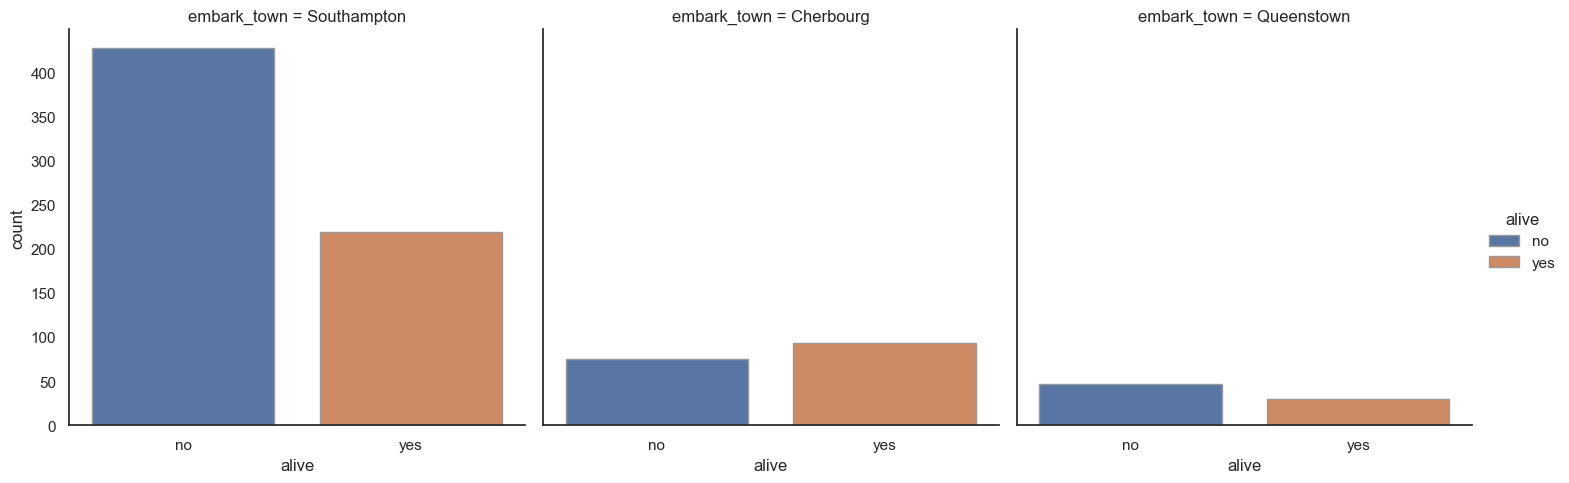

In [24]:
sns.catplot(x="alive",
            col = "embark_town",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=df_titanic);

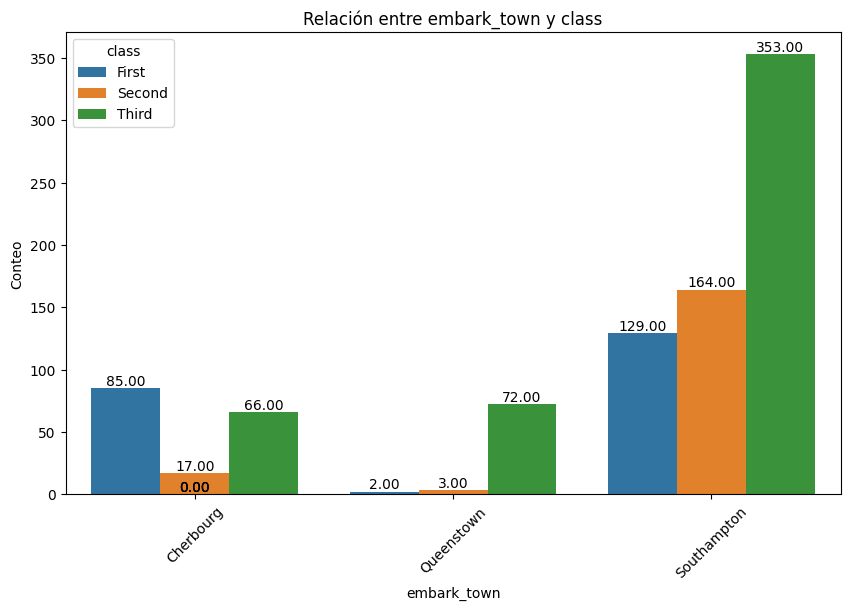

In [17]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", show_values = True)

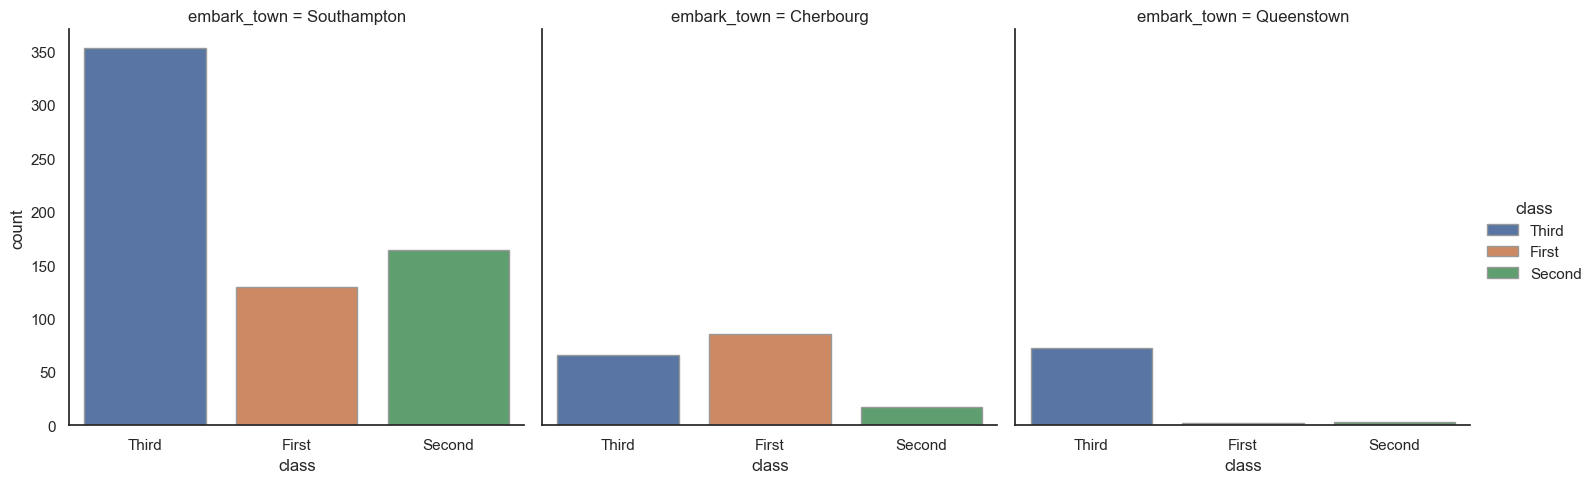

In [26]:
sns.catplot(x="class",
            col = "embark_town",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "class",
            legend= True,
            data=df_titanic);

*Según el gráfico de disposición de los datos analizados, así como según el test estadístico realizado, se observa correlación entre la ciudad de embarque con la supervivencia. Sin embargo, analizando la clase de los pasajeros que embarcaron en cada ciudad, se puede observar que la mayor parte de los pasajeros que embarcaron en Southampton fueron de tercera clase, con un número mucho más elevado de pasajeros que las otras dos clases. Este análisis, y basándome en el contexto histórico, indica que la mayor parte de fallecidos fueron pasajeros de tercera clase, dada su situación en el barco. Estos pasajeros, partían hacia NY en busca de un futuro mejor. Por ello, se puede determinar que la correlación se produce por la clase de pasajeros que embarcaron en cada ciudad, más que por la ciudad en la que embarcaron en sí.*